# Introduction 

This project focuses on classifying breast cancer as either benign or malignant using features derived from digitized images of fine needle aspirate (FNA) samples of breast masses. The dataset encompasses various characteristics of the cell nuclei in these images, such as texture, size, and shape, providing crucial insights into the morphological properties of the cells. These features serve as important indicators in differentiating between cancerous and non-cancerous cells.

The goal of this project is to develop a robust machine learning model that can accurately classify breast cancer types, contributing to early detection efforts, which is vital for improving treatment outcomes and patient survival rates. By leveraging a dataset rich in medical imaging features, the project not only aims to enhance diagnostic accuracy but also to explore the potential of machine learning in clinical settings. Early and precise classification of cancer types can lead to timely interventions, thus playing a critical role in personalized treatment plans and better health outcomes for patients.

Moreover, the application of advanced classification algorithms and rigorous evaluation methods in this project will help fine-tune the model's performance, ensuring that it provides reliable predictions. By combining feature engineering with data-driven insights, this work highlights the importance of machine learning in medical diagnostics and its potential to transform healthcare.

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn imports for data processing and model selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline

# Scikit-learn imports for different classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB  # Gaussian Naive Bayes

# Scikit-learn imports for model evaluation and metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import precision_score, recall_score, ConfusionMatrixDisplay

# Additional utilities
from scipy import stats  # For statistical analysis
import warnings
warnings.filterwarnings('ignore')

# Visualization customization
sns.set(style="whitegrid")  # Set Seaborn style for better plots
plt.rcParams['figure.figsize'] = [10, 6]  # Set default figure size for Matplotlib plots


# Loading the data

In [10]:
data = pd.read_csv('cancerdata.csv')

In [7]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# Data Exploration and Cleaning 

In [8]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
data.shape

(569, 33)

In [11]:
data.isnull().sum()
missing_percentage = data.isnull().sum() / len(data) * 100
print(missing_percentage)

id                           0.0
diagnosis                    0.0
radius_mean                  0.0
texture_mean                 0.0
perimeter_mean               0.0
area_mean                    0.0
smoothness_mean              0.0
compactness_mean             0.0
concavity_mean               0.0
concave points_mean          0.0
symmetry_mean                0.0
fractal_dimension_mean       0.0
radius_se                    0.0
texture_se                   0.0
perimeter_se                 0.0
area_se                      0.0
smoothness_se                0.0
compactness_se               0.0
concavity_se                 0.0
concave points_se            0.0
symmetry_se                  0.0
fractal_dimension_se         0.0
radius_worst                 0.0
texture_worst                0.0
perimeter_worst              0.0
area_worst                   0.0
smoothness_worst             0.0
compactness_worst            0.0
concavity_worst              0.0
concave points_worst         0.0
symmetry_w

We have no missing values in all our features 

In [12]:
data = data.drop(['Unnamed: 32', 'id'],axis=1)

In this code, we are removing two columns, `'Unnamed: 32'` and `'id'`, from the dataset. These columns are likely unnecessary for the analysis because they either contain irrelevant information or don't provide any useful insights. Dropping them helps clean up the data, making it easier to work with.

In [13]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
data.duplicated().sum()

0

We have no duplicates in the data

In [16]:
# View unique values of 'diagnosis' column
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [17]:
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

In [18]:
data["diagnosis"].head(100)

0     1
1     1
2     1
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: diagnosis, Length: 100, dtype: int64

In this code, we are first checking the unique values in the `'diagnosis'` column of the dataset. Then, we are mapping these values to numerical representations—'M' (malignant) is mapped to 1, and 'B' (benign) is mapped to 0. Finally, we are displaying the first 100 rows of the modified `'diagnosis'` column to verify the changes. This conversion is useful for preparing the data for machine learning models, which typically work better with numerical values.

In [19]:
data.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


In this code, we are using data.describe().T to generate summary statistics for the numerical columns in the dataset. This gives us key metrics like the count, mean, standard deviation, minimum, percentiles (25%, 50%, 75%), and maximum values for each feature. The .T transposes the data, making it easier to read by displaying each feature as a row.

*diagnosis*: The average value is 0.372, which shows that the proportion of malignant cases (1) is lower than benign cases (0).

*radius_mean*: The average radius is 14.13, with values ranging from about 6.98 to 28.11.

*texture_mean*: The average texture is 19.29, with a minimum of 9.71 and a maximum of 39.28.

*perimeter_mean*: The average perimeter is 91.97, with a wide range from 43.79 to 188.5.

*area_mean*: The average area is 654.89, with the smallest being 143.5 and the largest 2501.

*smoothness_mean*: The average smoothness is 0.096, with a fairly small range from 0.0526 to 0.1634.

In [21]:
corr_matrix = data.corr()
corr_matrix.T

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In this code, we are computing the correlation matrix for a dataset to examine the relationships between different features. The correlation matrix helps us identify how strongly or weakly features are related to one another, with values ranging from -1 to 1:

The correlation matrix and summary statistics reveal a few interesting observations. First, the `diagnosis` feature has a mean of 0.37, indicating that about 37% of the samples are malignant, while 63% are benign. Features like `area_mean`, `perimeter_mean`, and `radius_mean` show high variability, as indicated by their large ranges and standard deviations. For instance, `area_mean` ranges from 143.5 to 2501, with a standard deviation of 351.91, highlighting the wide spread in tumor sizes. The worst-case measurements (e.g., `radius_worst`, `area_worst`) have significantly higher means and maximum values, indicating that in extreme cases, tumor characteristics become more pronounced. These relationships can be useful for identifying patterns in the data that are important for diagnosis.

# Exploratory Data Analysis 

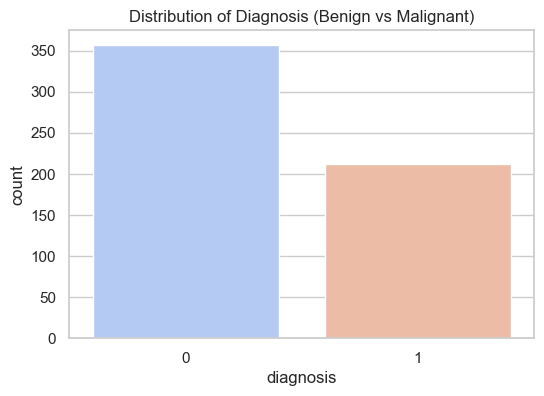

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=data, palette='coolwarm')
plt.title('Distribution of Diagnosis (Benign vs Malignant)')
plt.show()

The bar chart above shows the distribution of diagnoses for breast cancer cases, with "0" representing benign tumors and "1" representing malignant tumors. The plot clearly indicates that benign cases (0) are more frequent than malignant cases (1). There are over 350 benign cases and around 200 malignant cases in the dataset. This imbalance in the classes may be important to consider when modeling, as it suggests that the dataset has more benign instances, which could affect model performance if not handled appropriately.

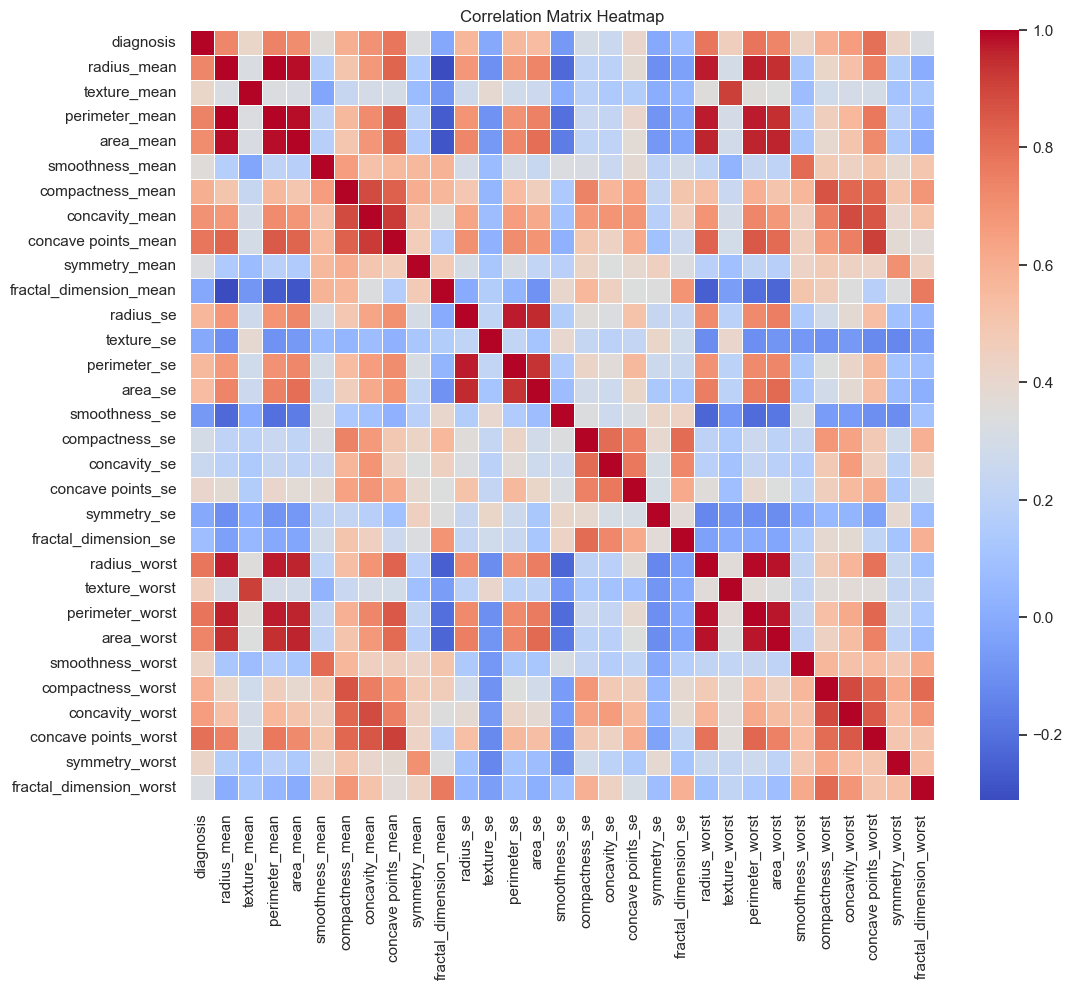

In [23]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [24]:
correlation_with_target = data.corr()['diagnosis'].sort_values(ascending=False)
print(correlation_with_target.head(10))
print(correlation_with_target.tail(10))

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
Name: diagnosis, dtype: float64
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
concavity_se               0.253730
fractal_dimension_se       0.077972
symmetry_se               -0.006522
texture_se                -0.008303
fractal_dimension_mean    -0.012838
smoothness_se             -0.067016
Name: diagnosis, dtype: float64


In analyzing the correlation of various features with the diagnosis of breast cancer, several significant observations emerge. The top features that correlate positively with a malignant diagnosis (1) include **concave points_worst** (0.79), **perimeter_worst** (0.78), and **concave points_mean** (0.77), indicating that these characteristics are strong predictors of malignancy. Other notable features include **radius_worst** (0.77) and **perimeter_mean** (0.74), suggesting that larger tumor dimensions and concave shapes are associated with malignant tumors. Conversely, the bottom features show a weaker correlation with the diagnosis, with **smoothness_se** (-0.067) and **fractal_dimension_mean** (-0.012) having the least association, implying that variations in smoothness and fractal dimension may not significantly impact tumor malignancy.

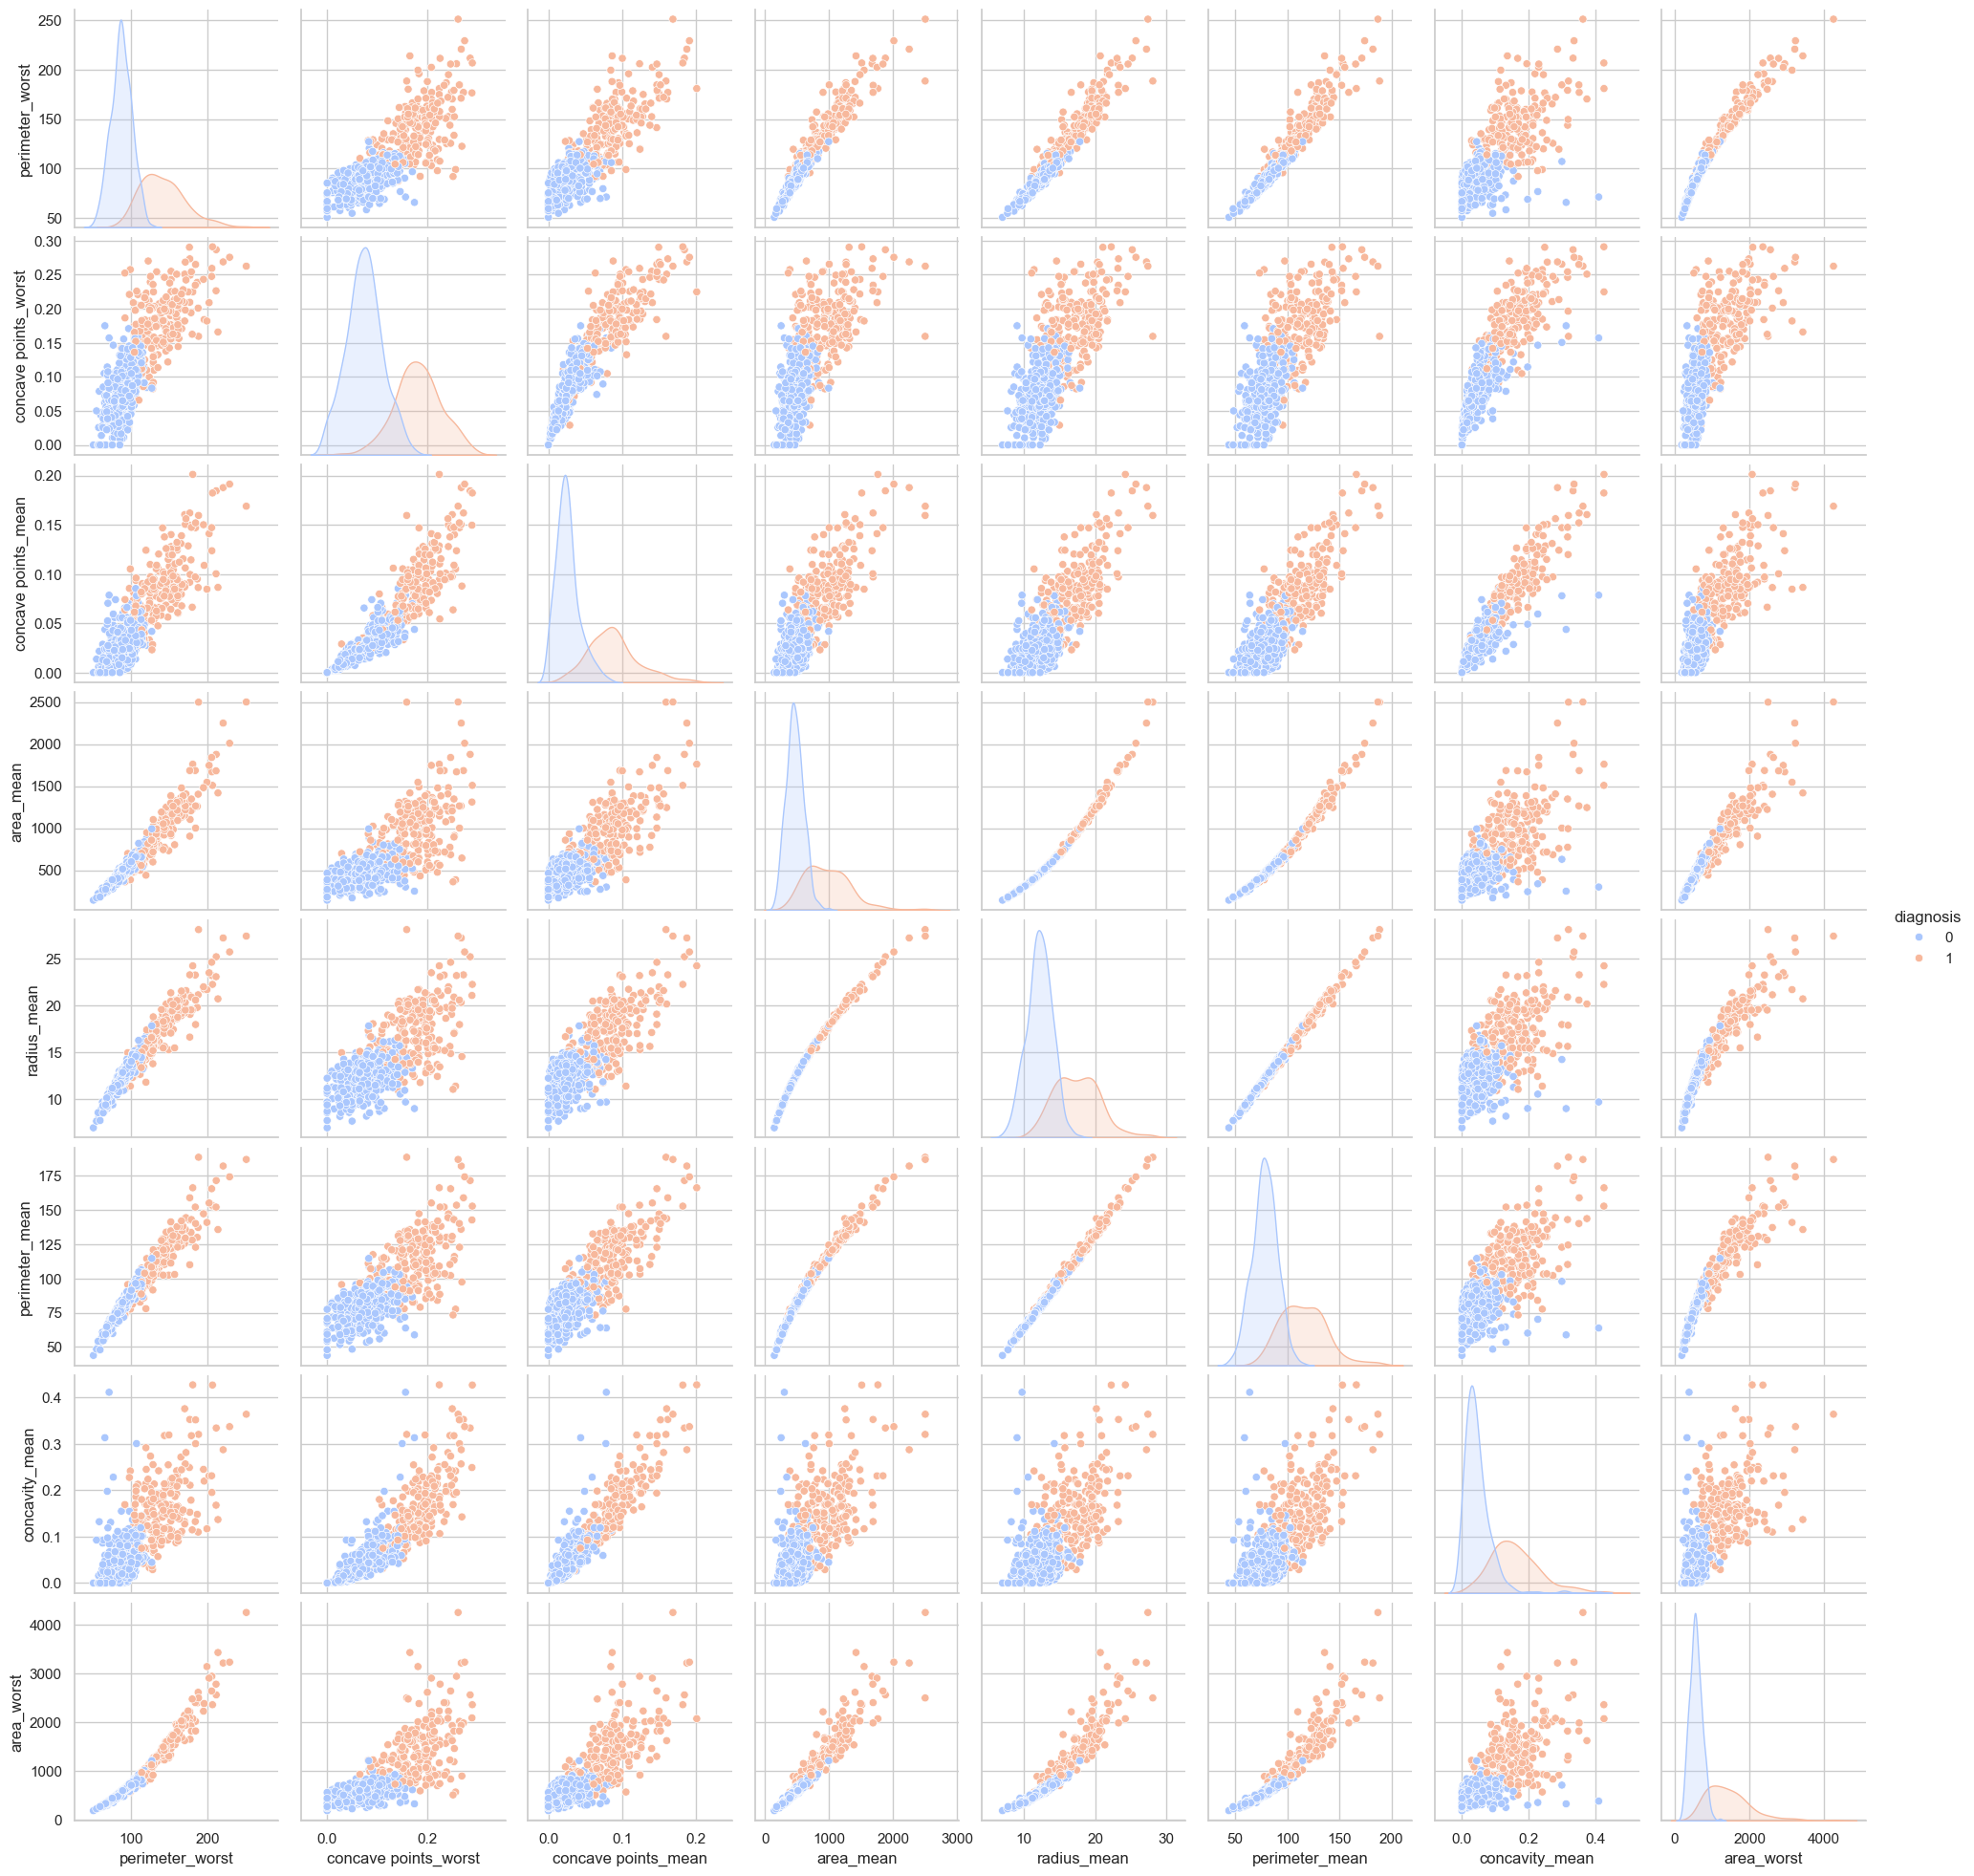

In [26]:

top_features = ["perimeter_worst","concave points_worst",'concave points_mean', 'area_mean', 'radius_mean', 'perimeter_mean', 'concavity_mean',"area_worst"]

sns.pairplot(data[top_features + ['diagnosis']], hue='diagnosis', palette='coolwarm')
plt.show()


The pair plot visually highlights the relationships between key tumor features and their ability to distinguish between benign and malignant cases. Features such as `perimeter_worst`, `concave points_worst`, and `area_worst` show strong separation between the two diagnoses, with malignant tumors typically having larger values across these metrics, as seen in the clustering of red points in the upper ranges. Additionally, there's clear linear correlation between size-related features (e.g., `area_worst` and `radius_mean`), reinforcing the link between larger tumor dimensions and malignancy. Overall, the plot indicates that these features are effective predictors of tumor diagnosis, with malignant tumors showing consistently higher values in size and shape-related characteristics compared to benign ones.

[1 0]


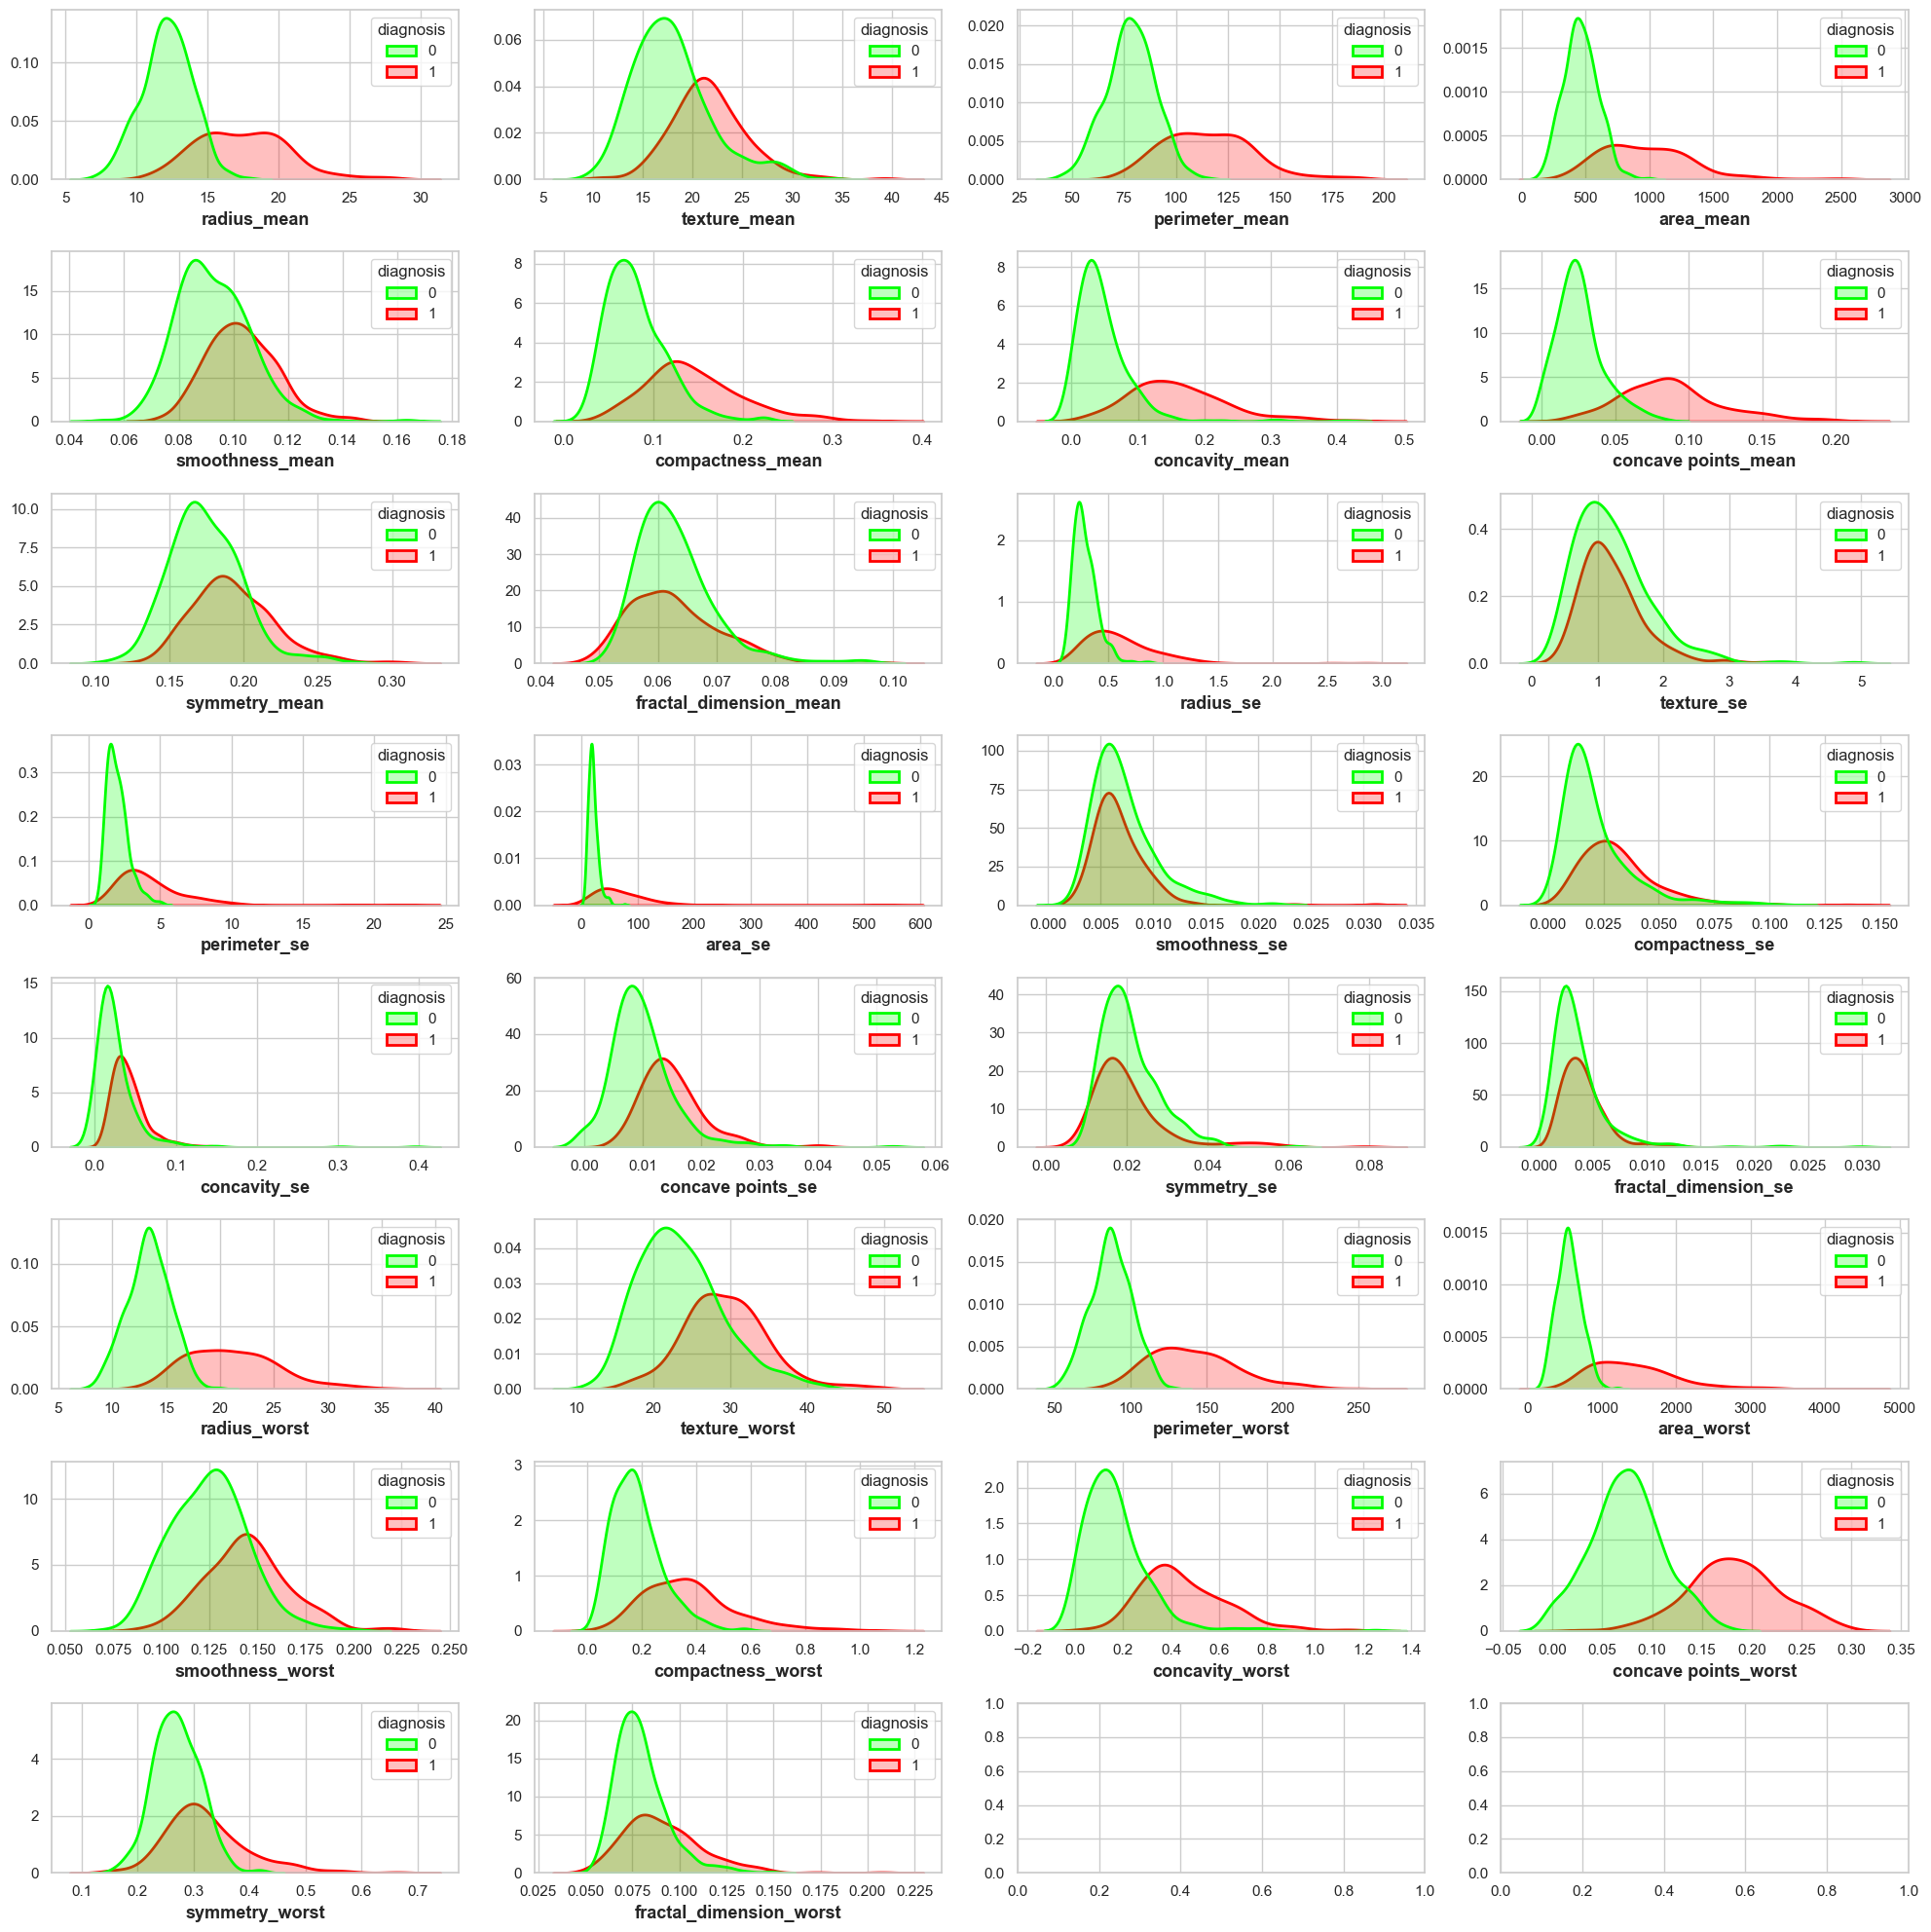

In [27]:
print(data['diagnosis'].unique())
palette = {1: '#FF0000', 0: '#00FF00'}  # Assuming 1 = Malignant, 0 = Benign
fig, ax = plt.subplots(8, 4, figsize=(20, 20))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:]):
    sns.kdeplot(x=col, data=data, ax=ax[i], fill=True, lw=2, hue='diagnosis', palette=palette)
    ax[i].set_xlabel(col, fontsize=13, fontweight='bold')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()


In the plot above, we are comparing the distribution of various tumor features between benign (green) and malignant (red) diagnoses. The key takeaway is that for most features, especially those related to size, shape, and perimeter (e.g., `perimeter_worst`, `area_worst`, and `concave points_worst`), malignant tumors tend to have higher values, as indicated by the red curve being shifted to the right. Features like `smoothness_mean` and `texture_mean` show more overlap between the two groups, suggesting they are less effective for distinguishing between benign and malignant cases. Overall, the plot highlights that malignant tumors are generally larger and more irregular compared to benign ones.

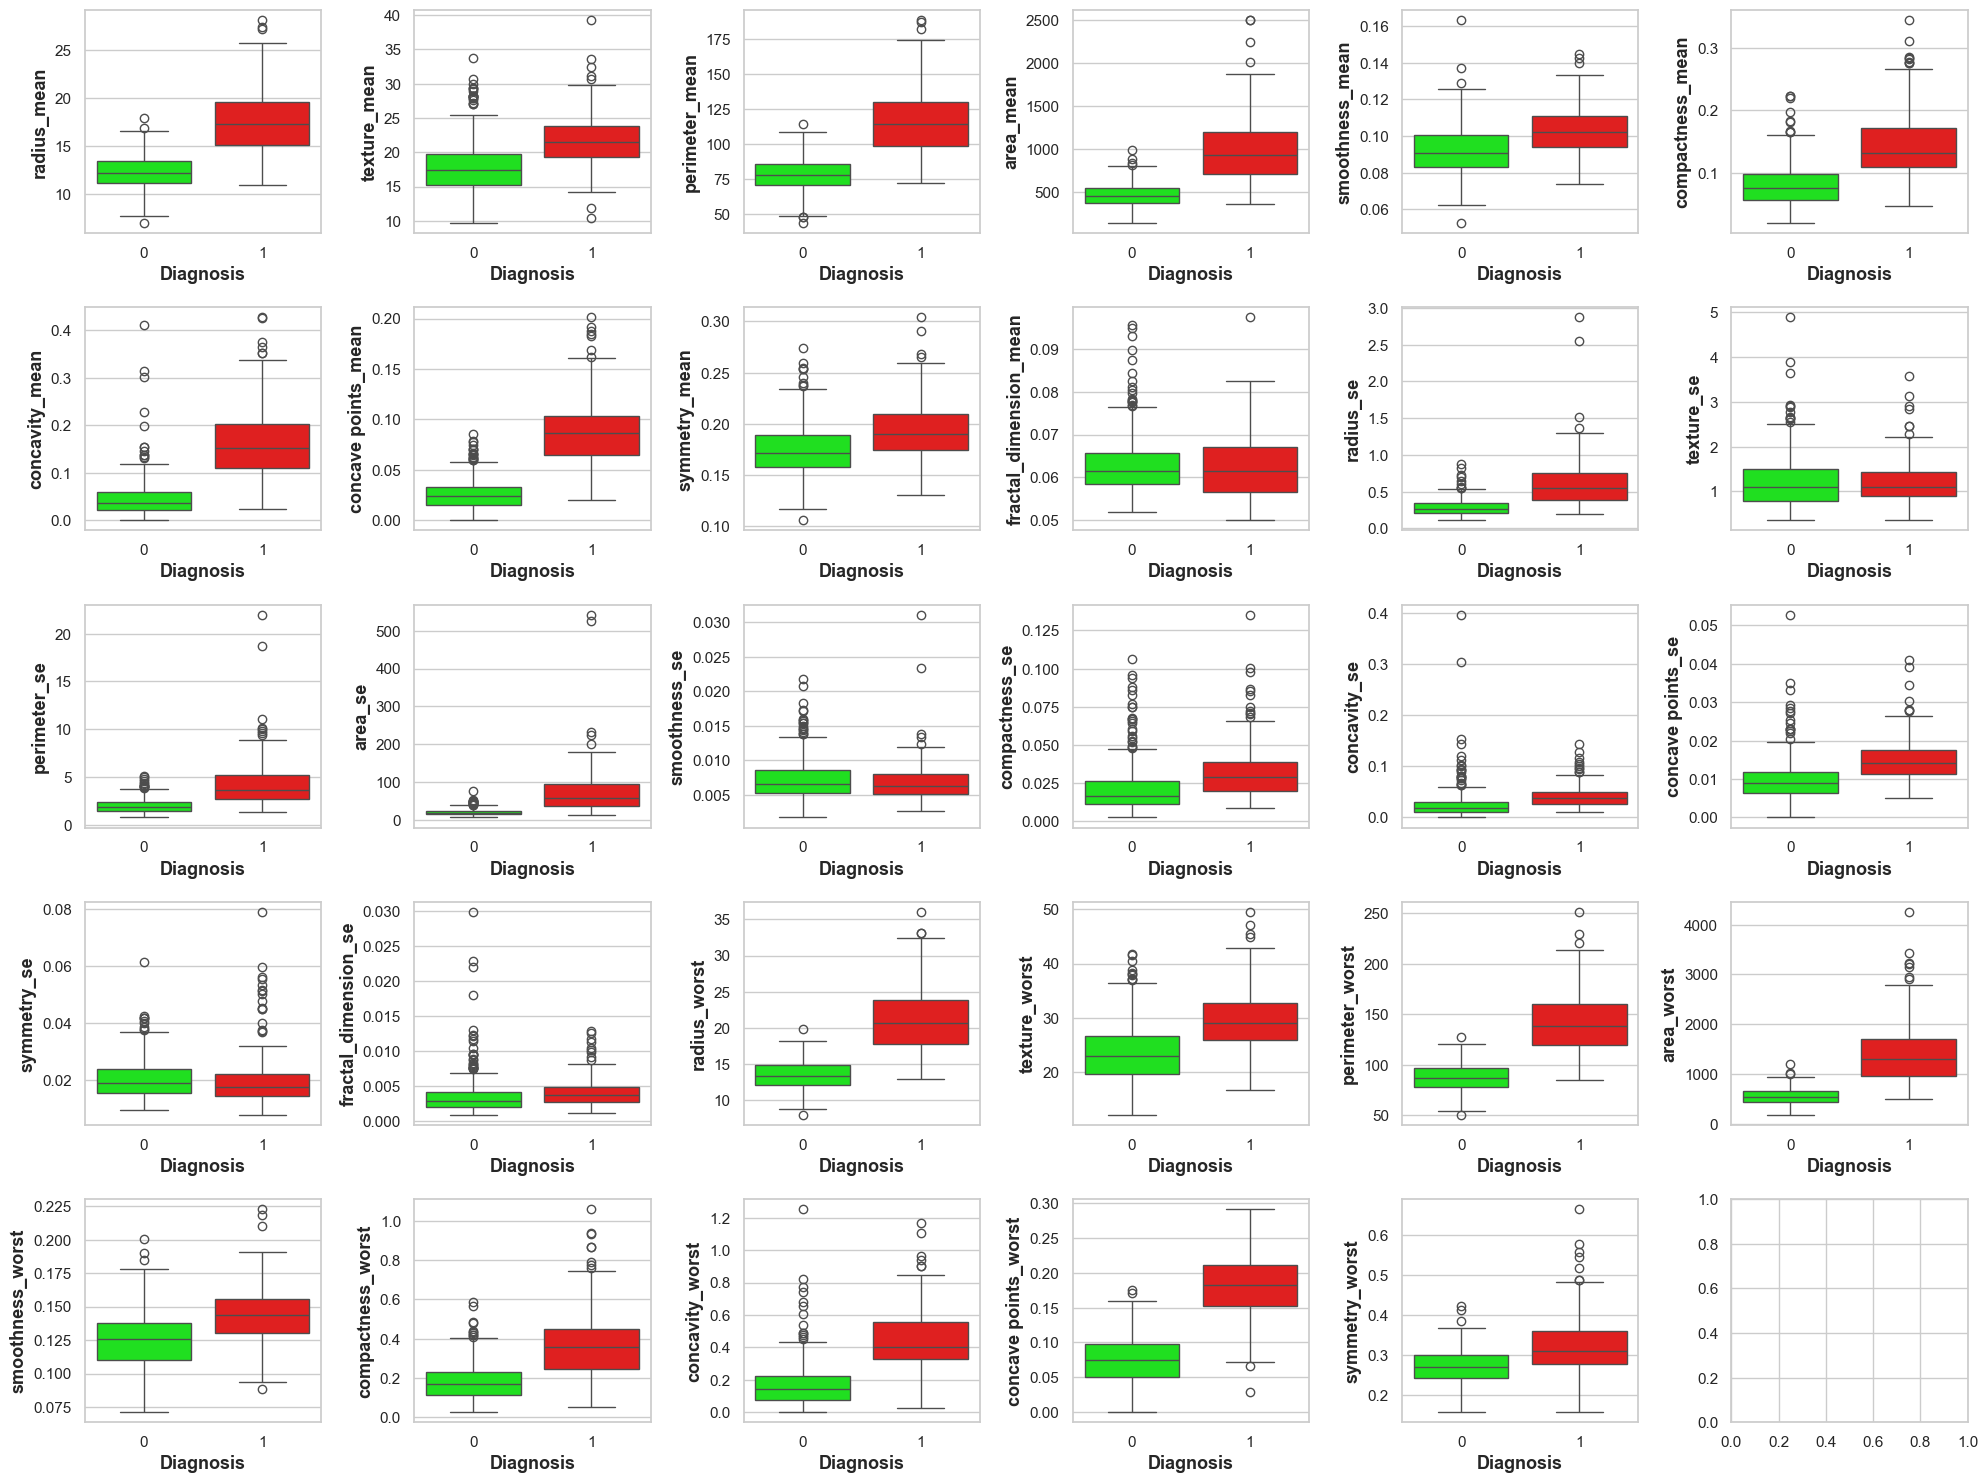

In [28]:
palette = {'1': '#FF0000', '0': '#00FF00'}

# Create a grid of subplots
fig, ax = plt.subplots(nrows=5, ncols=6, figsize=(20, 15))
ax = ax.flatten()

for i, col in enumerate(data.columns[1:-1]):  
    sns.boxplot(x='diagnosis', y=col, data=data, ax=ax[i], palette=palette)
    ax[i].set_xlabel('Diagnosis', fontsize=13, fontweight='bold')
    ax[i].set_ylabel(col, fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

In the plot above, we are comparing the distribution of various tumor features for benign (green) and malignant (red) cases using box plots. The red boxes, representing malignant cases, generally show higher median values across most features, especially for `perimeter_worst`, `area_worst`, `radius_mean`, and `concave points_worst`, indicating that malignant tumors tend to have larger sizes and more irregular shapes. In contrast, the green boxes, representing benign tumors, show lower values for these features, with less variability. The presence of several outliers in both groups suggests some overlap between benign and malignant cases, but the higher spread in the malignant group emphasizes the more extreme feature values typically associated with cancerous tumors. These observations are consistent with the previous visuals. 

# Model Training and Evaluation

In [29]:
X = data.drop(['diagnosis'], axis=1)
y = data['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In this code, we are preparing the data for machine learning by performing several key steps. First, we separate the features (`X`) from the target variable (`y`, which is the diagnosis). We then split the dataset into training (80%) and testing (20%) sets, ensuring that the class distribution (benign vs malignant) remains balanced using stratified sampling. After splitting, we standardize the feature values using `StandardScaler`, which scales the data so that each feature has a mean of 0 and a standard deviation of 1. This step helps improve model performance by ensuring that features are on the same scale. We fit the scaler on the training data and apply the transformation to both the training and test sets, preparing the data for further model training and evaluation.

In [30]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)

logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9737
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [33]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train_scaled, y_train)
y_pred_gb = gb.predict(X_test_scaled)

gb_accuracy = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



In [34]:
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Gradient Boosting Accuracy: {gb_accuracy:.4f}")

Logistic Regression Accuracy: 0.9649
Random Forest Accuracy: 0.9737
SVM Accuracy: 0.9649
Gradient Boosting Accuracy: 0.9649


In this code, we are training and evaluating four different machine learning models—Logistic Regression, Random Forest, Support Vector Machine (SVM), and Gradient Boosting—on the standardized training dataset and testing them on the test dataset. First, we train a Logistic Regression model and calculate its accuracy and classification report on the test data, achieving an accuracy of 96.49%. Next, we train a Random Forest model, which slightly improves performance with an accuracy of 97.37%. After that, we train an SVM model using a linear kernel and achieve the same accuracy as Logistic Regression, 96.49%. Finally, we train a Gradient Boosting model, which also achieves an accuracy of 96.49%. For each model, the classification report provides detailed metrics such as precision, recall, and F1-score, allowing us to compare their performance beyond just accuracy.

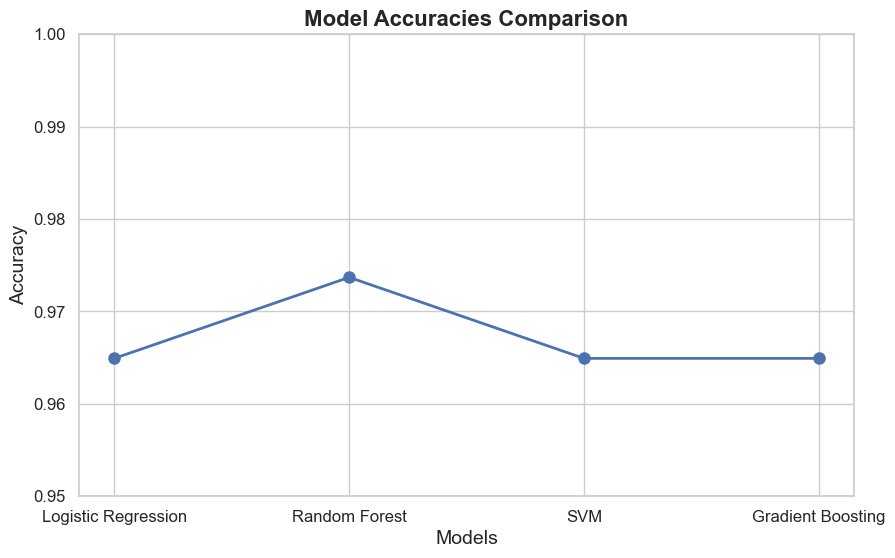

In [35]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM', 'Gradient Boosting']
accuracies = [logreg_accuracy, rf_accuracy, svm_accuracy, gb_accuracy]

plt.figure(figsize=(10, 6))
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b', markersize=8, lw=2)
plt.ylim(0.95, 1.0)

plt.title('Model Accuracies Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

# Conclusion 

In conclusion, this project successfully developed and evaluated several machine learning models for classifying breast cancer as either benign or malignant using features derived from fine needle aspirate (FNA) images. By training and testing models such as Logistic Regression, Random Forest, SVM, and Gradient Boosting, we demonstrated that these algorithms can achieve high accuracy, with Random Forest showing the best performance at 97.37%. These results highlight the potential of machine learning in assisting with the early detection of breast cancer, providing valuable support to healthcare professionals in making informed decisions. Future work could involve fine-tuning these models, exploring additional feature engineering techniques, and testing on larger datasets to further enhance predictive accuracy and generalization. The outcome of this project underscores the importance of data-driven approaches in improving cancer diagnosis and patient outcomes.

# References 

1. Dua, D., & Graff, C. (2019). UCI Machine Learning Repository: Breast Cancer Wisconsin (Diagnostic)

2. Wolberg, W.H., Street, W.N., & Mangasarian, O.L. (1992). Machine Learning Techniques to Diagnose Breast Cancer Based on Cell Nucleus Features. *International Journal of Machine Learning*

3. Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., … Duchesnay, É. (2011). Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*

4. Breiman, L. (2001). Random Forests. *Machine Learning*

5. Tiwari, A., Srivastava, S., Pant, M. (2021). A review of breast cancer detection techniques: Machine learning with medical imaging and signal processing. *Computers in Biology and Medicine*

6. Chaurasia, V., & Pal, S. (2017). Data Mining Techniques: To Predict and Resolve Breast Cancer Survivability. *International Journal of Computer Science and Information Technologies*

# --- END ---